In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (8, 6)

# Ward-level dataset (Delhi)
data = pd.DataFrame({
    'Ward': ['Narela', 'Burari', 'Timarpur', 'Adarsh Nagar', 'Badli',
             'Rithala', 'Bawana', 'Mundka', 'Kirari', 'Sultanpur Majra',
             'Nangloi Jat', 'Mangolpuri', 'Rohini', 'Shalimar Bagh',
             'Shakur Basti', 'Tri Nagar', 'Wazirpur', 'Model Town',
             'Sadar Bazar', 'Chandni Chowk', 'Matia Mahal', 'Ballimaran',
             'Karol Bagh', 'Patel Nagar', 'Moti Nagar', 'Madipur',
             'Rajouri Garden', 'Hari Nagar', 'Tilak Nagar', 'Janakpuri',
             'Vikaspuri', 'Uttam Nagar', 'Dwarka', 'Matiala', 'Najafgarh',
             'Palam', 'Bijawasan', 'Rajinder Nagar', 'Jangpura',
             'Kasturba Nagar', 'Malviya Nagar', 'R.K. Puram', 'Mehrauli',
             'Chhatarpur', 'Deoli', 'Ambedkar Nagar', 'Sangam Vihar',
             'Greater Kailash', 'Kalkaji', 'Tughlakabad', 'Badarpur',
             'Okhla', 'Trilokpuri', 'Kondli', 'Patparganj', 'Laxmi Nagar',
             'Vishwas Nagar', 'Krishna Nagar', 'Gandhi Nagar', 'Shahdara',
             'Seemapuri', 'Rohtas Nagar', 'Seelampur', 'Ghonda', 'Babarpur',
             'Gokalpur', 'Mustafabad', 'Karawal Nagar'],
    'Population': [317613, 365094, 226714, 188217, 290313,
                   318432, 382982, 312877, 345718, 215382,
                   261250, 231907, 229014, 214230, 197655,
                   207098, 208603, 181770, 218555, 151602,
                   171340, 191208, 198779, 222575, 203736,
                   220157, 206182, 190950, 198046, 220610,
                   393743, 274047, 212346, 421399, 286475,
                   247765, 298236, 202067, 150049, 171951,
                   157689, 174850, 200191, 253111, 288573,
                   199657, 217711, 185553, 190137, 198828,
                   336494, 319309, 241540, 233716, 221317,
                   241422, 222188, 254199, 197256, 214263,
                   236936, 240981, 236415, 242690, 240313,
                   293805, 311504, 321304],
    'Income': [214207, 347005, 1576746, 1012983, 191279, 1383237,
               496115, 346720, 141530, 250372, 273041, 331906,
               1480252, 2265377, 1164147, 868325, 1848834, 5869901,
               973358, 6960498, 1536242, 514649, 8376434, 4704466,
               917446, 389619, 2746526, 1491583, 980111, 532746,
               235372, 1960602, 424550, 237376, 264907, 1076963,
               537332, 9757825, 6648407, 5182767, 3026136, 4617168,
               1773801, 600072, 224639, 250400, 397525, 3398571,
               7885379, 483867, 308131, 1914659, 468992, 436487,
               1020612, 1815682, 1632853, 1794519, 247346, 145390,
               1571266, 492280, 447028, 135382, 381066, 447994,
               194050, 162568],
    'Vehicles': [65080, 84238, 114380, 83920, 76732, 133833, 77225,
                 77139, 81830, 63099, 76020, 51954, 102314, 134572,
                 101388, 90015, 85502, 154861, 126151, 140557,
                 91730, 81634, 190685, 160388, 81163, 63330,
                 206168, 107913, 115166, 111490, 90043, 86136,
                 47202, 106646, 77347, 129646, 138718, 133386,
                 115851, 153710, 116235, 162392, 99961, 80160,
                 72851, 58870, 49596, 134674, 187588, 54195,
                 85203, 179366, 68418, 62680, 109933, 105118,
                 97508, 81906, 50259, 60279, 136826, 56551,
                 59094, 52367, 69724, 74669, 74431, 85330]
})

data.head()


,Ward,Population,Income,Vehicles
0,Narela,317613,214207,65080
1,Burari,365094,347005,84238
2,Timarpur,226714,1576746,114380
3,Adarsh Nagar,188217,1012983,83920
4,Badli,290313,191279,76732


Shape: (68, 4)

Summary statistics:
          Population        Income       Vehicles
count      68.000000  6.800000e+01      68.000000
mean   241450.573529  1.658612e+06   99049.205882
std     59878.405158  2.188135e+06   37751.241603
min    150049.000000  1.353820e+05   47202.000000
25%    199449.750000  3.430165e+05   74036.000000
50%    222381.500000  7.341985e+05   85819.000000
75%    277154.000000  1.799810e+06  118714.000000
max    421399.000000  9.757825e+06  206168.000000


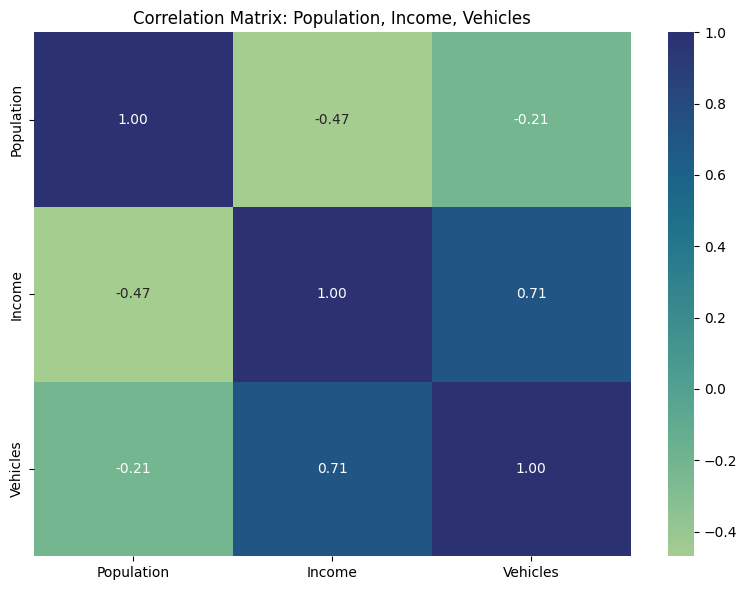

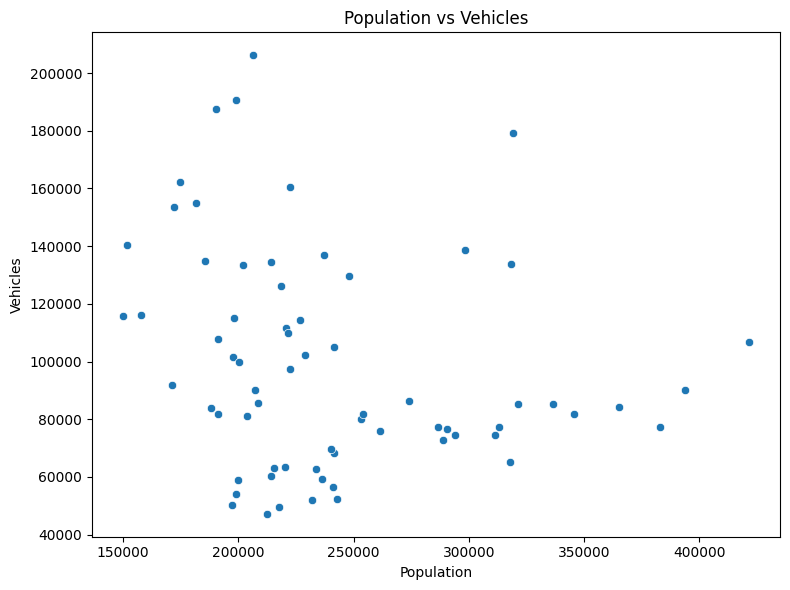

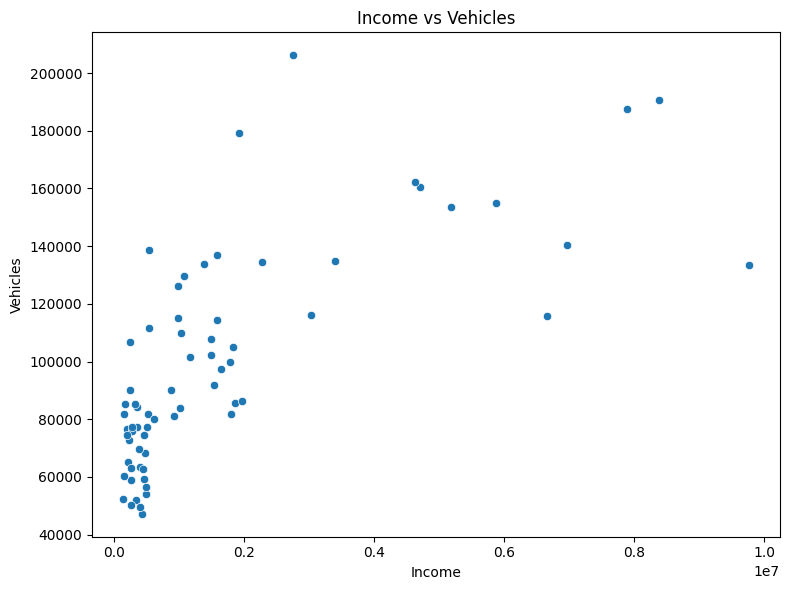

In [2]:
# %%
print("Shape:", data.shape)
print("\nSummary statistics:")
print(data.describe())

# Correlation heatmap
plt.figure()
corr = data[['Population', 'Income', 'Vehicles']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="crest")
plt.title("Correlation Matrix: Population, Income, Vehicles")
plt.tight_layout()
plt.show()

# Population vs Vehicles
plt.figure()
sns.scatterplot(data=data, x="Population", y="Vehicles")
plt.title("Population vs Vehicles")
plt.tight_layout()
plt.show()

# Income vs Vehicles
plt.figure()
sns.scatterplot(data=data, x="Income", y="Vehicles")
plt.title("Income vs Vehicles")
plt.tight_layout()
plt.show()


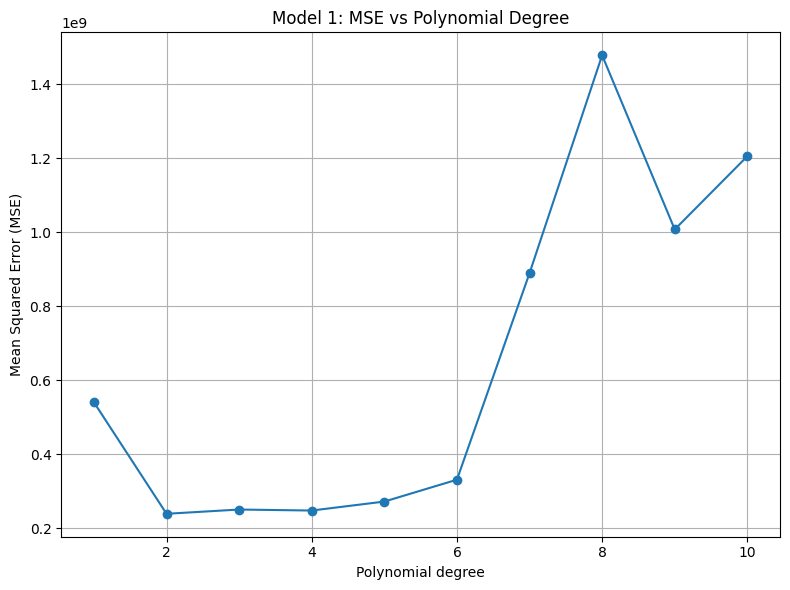

Best degree for Model 1 (based on test MSE): 2

Model 1 performance on test set:
MAE : 12653.491208329582
MSE : 238659980.83332238
RMSE: 15448.623913906455
R²  : 0.8000369299745307


In [3]:
# %%
features_m1 = ['Population', 'Income']
X_m1 = data[features_m1].values
y_m1 = data['Vehicles'].values

X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(
    X_m1, y_m1, test_size=0.2, random_state=42
)

degrees = range(1, 11)
mse_m1 = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_m1)
    X_test_poly = poly.transform(X_test_m1)

    model = LinearRegression()
    model.fit(X_train_poly, y_train_m1)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test_m1, y_pred)
    mse_m1.append(mse)

plt.figure()
plt.plot(degrees, mse_m1, marker="o")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model 1: MSE vs Polynomial Degree")
plt.grid(True)
plt.tight_layout()
plt.show()

best_degree_m1 = int(np.argmin(mse_m1) + 1)
print(f"Best degree for Model 1 (based on test MSE): {best_degree_m1}")

# Fit final Model 1 with best degree
poly_m1 = PolynomialFeatures(degree=best_degree_m1, include_bias=False)
X_train_poly_m1 = poly_m1.fit_transform(X_train_m1)
X_test_poly_m1 = poly_m1.transform(X_test_m1)

final_m1 = LinearRegression()
final_m1.fit(X_train_poly_m1, y_train_m1)

y_pred_m1 = final_m1.predict(X_test_poly_m1)

print("\nModel 1 performance on test set:")
print("MAE :", mean_absolute_error(y_test_m1, y_pred_m1))
print("MSE :", mean_squared_error(y_test_m1, y_pred_m1))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m1, y_pred_m1)))
print("R²  :", r2_score(y_test_m1, y_pred_m1))


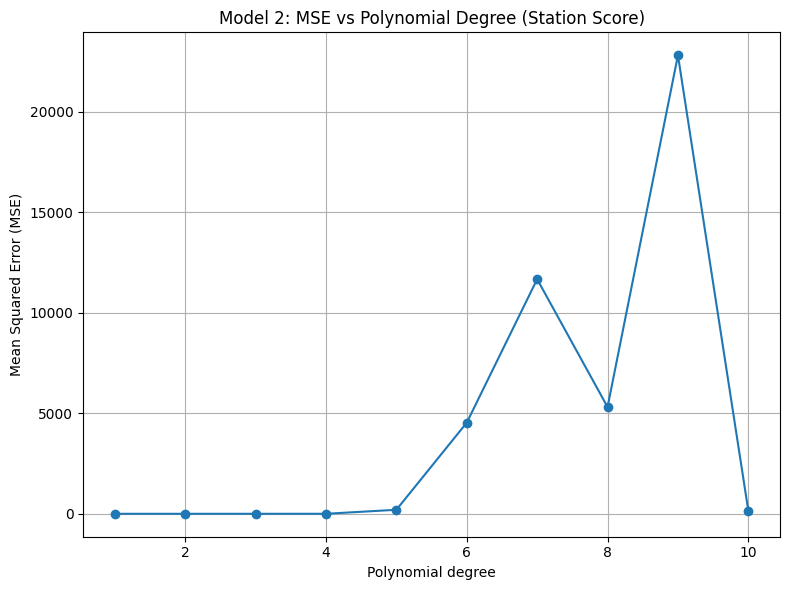

Best degree for Model 2 (based on test MSE): 1

Model 2 performance on test set:
MAE : 1.5124409661179275e-13
MSE : 3.085798472394535e-26
RMSE: 1.7566440938319108e-13
R²  : 1.0


In [4]:
# %%
# Create a station success score (0–100) from normalized features
scaler_m2 = MinMaxScaler()
norm_features = scaler_m2.fit_transform(data[['Population', 'Vehicles', 'Income']])
data['pop_norm'], data['veh_norm'], data['inc_norm'] = norm_features.T

data['station_score'] = (
    0.35 * data['pop_norm'] +
    0.45 * data['veh_norm'] +
    0.20 * data['inc_norm']
) * 100.0  # scale to ~0–100

features_m2 = ['Population', 'Vehicles', 'Income']
X_m2 = data[features_m2].values
y_m2 = data['station_score'].values

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(
    X_m2, y_m2, test_size=0.2, random_state=42
)

degrees = range(1, 11)
mse_m2 = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_m2)
    X_test_poly = poly.transform(X_test_m2)

    model = LinearRegression()
    model.fit(X_train_poly, y_train_m2)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test_m2, y_pred)
    mse_m2.append(mse)

plt.figure()
plt.plot(degrees, mse_m2, marker="o")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model 2: MSE vs Polynomial Degree (Station Score)")
plt.grid(True)
plt.tight_layout()
plt.show()

best_degree_m2 = int(np.argmin(mse_m2) + 1)
print(f"Best degree for Model 2 (based on test MSE): {best_degree_m2}")

# Fit final Model 2
poly_m2 = PolynomialFeatures(degree=best_degree_m2, include_bias=False)
X_train_poly_m2 = poly_m2.fit_transform(X_train_m2)
X_test_poly_m2 = poly_m2.transform(X_test_m2)

final_m2 = LinearRegression()
final_m2.fit(X_train_poly_m2, y_train_m2)

y_pred_m2 = final_m2.predict(X_test_poly_m2)

print("\nModel 2 performance on test set:")
print("MAE :", mean_absolute_error(y_test_m2, y_pred_m2))
print("MSE :", mean_squared_error(y_test_m2, y_pred_m2))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m2, y_pred_m2)))
print("R²  :", r2_score(y_test_m2, y_pred_m2))


           Ward  station_score station_category
0        Narela      26.837923         Moderate
1        Burari      38.661498         Moderate
2      Timarpur      31.901158         Moderate
3  Adarsh Nagar      17.141269            Worst
4         Badli      26.567426         Moderate

Random Forest classification performance:
Balanced Accuracy: 0.6

Classification report:
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         2
    Moderate       0.70      1.00      0.82         7
       Worst       1.00      0.80      0.89         5

    accuracy                           0.79        14
   macro avg       0.57      0.60      0.57        14
weighted avg       0.71      0.79      0.73        14

Confusion matrix:
[[0 2 0]
 [0 7 0]
 [0 1 4]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


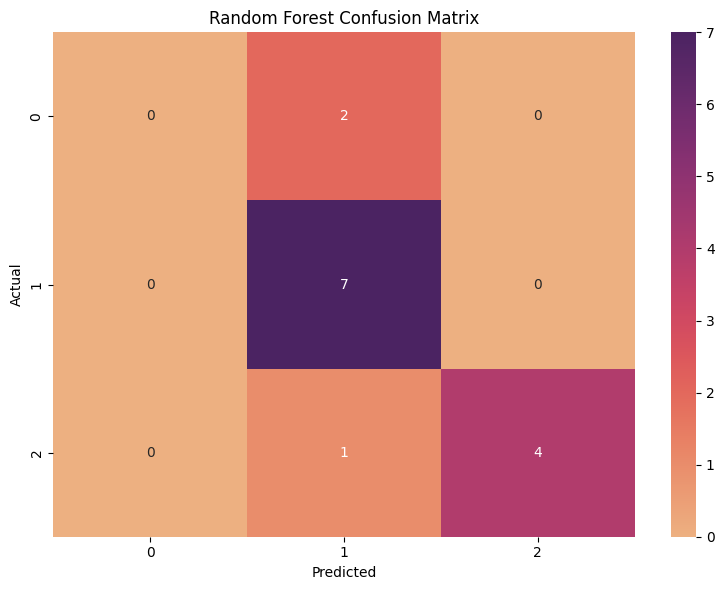

In [5]:
# %%
# Discretize station_score into four categories
score_bins = [0, 25, 50, 75, 100]
score_labels = ['Worst', 'Moderate', 'Good', 'Best']
data['station_category'] = pd.cut(
    data['station_score'],
    bins=score_bins,
    labels=score_labels,
    include_lowest=True
)

print(data[['Ward', 'station_score', 'station_category']].head())

X_cls = data[['Population', 'Vehicles', 'Income']].values
y_cls = data['station_category'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train_c, y_train_c)

y_pred_c = rf.predict(X_test_c)

bal_acc = balanced_accuracy_score(y_test_c, y_pred_c)
print("\nRandom Forest classification performance:")
print("Balanced Accuracy:", bal_acc)
print("\nClassification report:")
print(classification_report(y_test_c, y_pred_c))

print("Confusion matrix:")
print(confusion_matrix(y_test_c, y_pred_c))

# Confusion matrix heatmap
plt.figure()
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt="d", cmap="flare")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


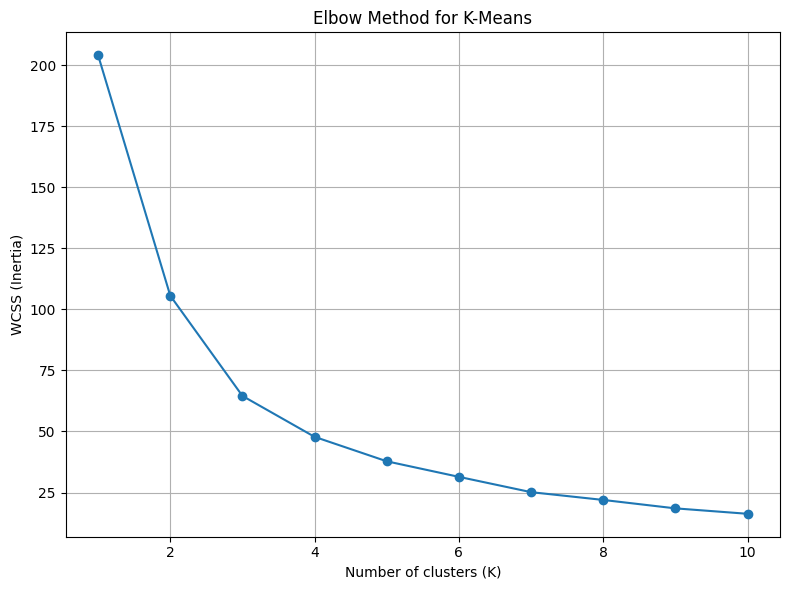

In [6]:
# %%
scaler_km = StandardScaler()
X_km = scaler_km.fit_transform(data[['Population', 'Vehicles', 'Income']])

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_km)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for K-Means")
plt.grid(True)
plt.tight_layout()
plt.show()


Average station_score by cluster:
cluster
3    15.749523
0    28.273415
2    33.398364
1    48.434145
4    53.825511
Name: station_score, dtype: float64

Sample of wards with assigned clusters and profitability bands:
           Ward  Population  Vehicles   Income  station_score  \
0        Narela      317613     65080   214207      26.837923   
1        Burari      365094     84238   347005      38.661498   
2      Timarpur      226714    114380  1576746      31.901158   
3  Adarsh Nagar      188217     83920  1012983      17.141269   
4         Badli      290313     76732   191279      26.567426   

  station_category  cluster profit_band  
0         Moderate        2      25–50%  
1         Moderate        2      25–50%  
2         Moderate        0       0–25%  
3            Worst        0       0–25%  
4         Moderate        2      25–50%  


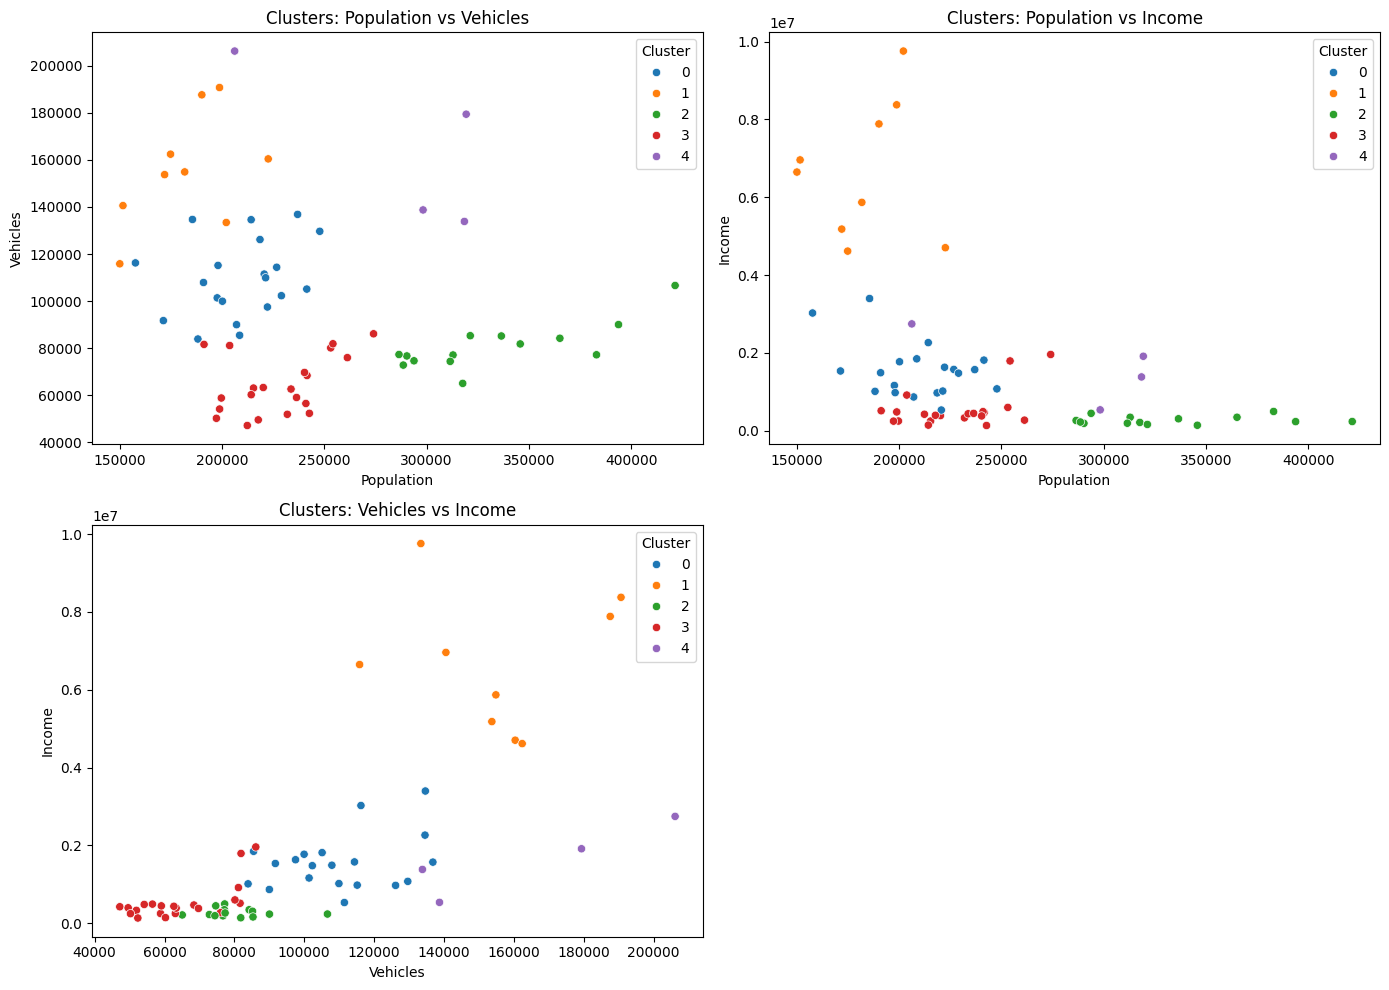

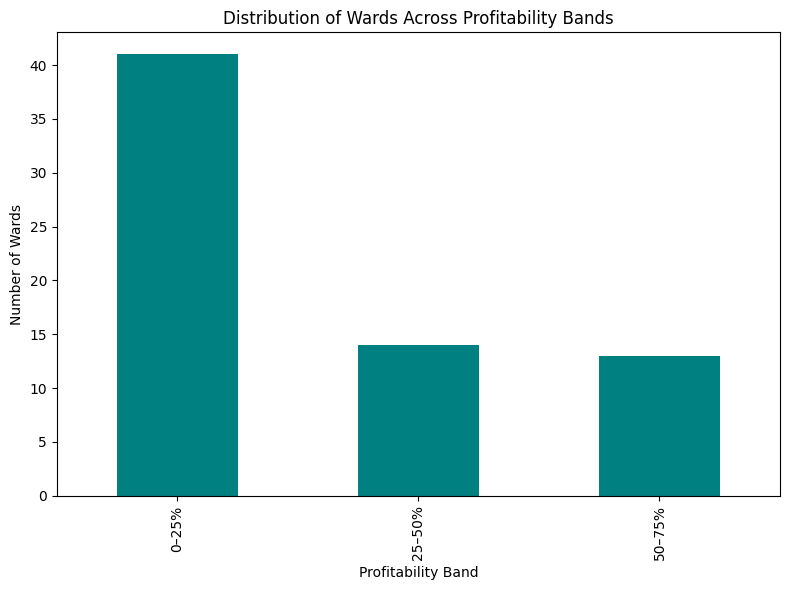


=== Final Ward Success Probability Table ===

              Ward  station_score station_category  cluster profit_band
0       Karol Bagh      64.031321             Good        1      50–75%
1            Okhla      62.943039             Good        4      50–75%
2          Kalkaji      61.019293             Good        1      50–75%
3   Rajouri Garden      57.667494             Good        4      50–75%
4          Matiala      52.039364             Good        2      25–50%
..             ...            ...              ...      ...         ...
63    Sangam Vihar       9.949913            Worst        3       0–25%
64  Ambedkar Nagar       9.940706            Worst        3       0–25%
65     Tughlakabad       8.995636            Worst        3       0–25%
66          Dwarka       8.636388            Worst        3       0–25%
67    Gandhi Nagar       7.187069            Worst        3       0–25%

[68 rows x 5 columns]


In [9]:
# %%
optimal_k = 5  # chosen based on elbow
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['cluster'] = kmeans_final.fit_predict(X_km)

cluster_mean_score = data.groupby('cluster')['station_score'].mean().sort_values()
print("Average station_score by cluster:")
print(cluster_mean_score)

# Map clusters to profitability bands based on mean station_score
# Use quantiles of cluster means to assign 0–25%, 25–50%, 50–75%
cluster_band = pd.qcut(
    cluster_mean_score,
    q=3,
    labels=['0–25%', '25–50%', '50–75%']
)
cluster_band_mapping = cluster_band.to_dict()

data['profit_band'] = data['cluster'].map(cluster_band_mapping)

print("\nSample of wards with assigned clusters and profitability bands:")
print(data[['Ward', 'Population', 'Vehicles', 'Income',
            'station_score', 'station_category', 'cluster', 'profit_band']].head())

# Scatter plots of clusters similar to the paper
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(
    data=data,
    x='Population',
    y='Vehicles',
    hue='cluster',
    palette='tab10'
)
plt.title("Clusters: Population vs Vehicles")
plt.legend(title="Cluster")

plt.subplot(2, 2, 2)
sns.scatterplot(
    data=data,
    x='Population',
    y='Income',
    hue='cluster',
    palette='tab10'
)
plt.title("Clusters: Population vs Income")
plt.legend(title="Cluster")

plt.subplot(2, 2, 3)
sns.scatterplot(
    data=data,
    x='Vehicles',
    y='Income',
    hue='cluster',
    palette='tab10'
)
plt.title("Clusters: Vehicles vs Income")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()

# Profitability distribution bar chart
plt.figure()
data['profit_band'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Distribution of Wards Across Profitability Bands")
plt.xlabel("Profitability Band")
plt.ylabel("Number of Wards")
plt.tight_layout()
plt.show()

# %%
# Final sorted output: wards ranked by success probability
final_table = data[['Ward',
                    'station_score',
                    'station_category',
                    'cluster',
                    'profit_band']].sort_values(
                        by='station_score', ascending=False
                    ).reset_index(drop=True)

print("\n=== Final Ward Success Probability Table ===\n")
print(final_table)



